In [76]:
#importing libraries

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [78]:
#imports stackingclasifier for combining multiple models into an ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [79]:
train = pd.read_csv('../../12_data/titanic/train.csv')
test = pd.read_csv('../../12_data/titanic/test.csv')

In [80]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
#Extracts the target variables (survived) from the training set and store it in y
y = train['Survived']

#Drops survived(target)and passenserId(idenfier) from training data and stores the remaining features in X
# Drop survived in X because X should only contain inut features not the answers.
# including survied in X would be like giving the model the correct answer in advance = lead to data leakage and invalid training
X = train.drop(['Survived', 'PassengerId'], axis=1)
X_test = test.drop(['PassengerId'], axis=1)


In [108]:
X_train = X

In [109]:
#preprocessing functions - use multiple functions, because i aim to achieve
"""
1. improve model performance :Properly handling missing values and transforming key features (like sex and family size) allows the model to learn data patterns better, resulting in higher prediction accuracy.
2. Consistent Data processing : Applying the exact same preprocessing logic to both training and test data reduces errors and biases caused by differences in data handling.
3. Code Reusability and Maintainability L\:Modularizing preprocessing steps into functions allows to reuse code easily and update methods in one place, making maintenance much simpler.
4. Easy Experimentation and Comparison : can quickly test various combinations and systematically evaluate which works best.
"""

'\n1. improve model performance :Properly handling missing values and transforming key features (like sex and family size) allows the model to learn data patterns better, resulting in higher prediction accuracy.\n2. Consistent Data processing : Applying the exact same preprocessing logic to both training and test data reduces errors and biases caused by differences in data handling.\n3. Code Reusability and Maintainability L\\:Modularizing preprocessing steps into functions allows to reuse code easily and update methods in one place, making maintenance much simpler.\n4. Easy Experimentation and Comparison : can quickly test various combinations and systematically evaluate which works best.\n'

In [110]:
def fill_age(df, strategy='median'):
    """
    Fill missing values in the 'Age' column of the dataframe.
    
    Parameters:
        df (pd.DataFrame): Input dataframe with 'Age' column
        strategy (str): Method to fill missing values. Options:
                        - 'median': fill with median age (default)
                        - 'mean': fill with mean age
                        - 'zero': fill with 0
                        - 'random': fill with random sampled ages from existing data
        
    Returns:
        pd.DataFrame: DataFrame with missing 'Age' values filled.
    """
    
    if strategy == 'median':
        fill_value = df['Age'].median()
        df['Age'] = df['Age'].fillna(fill_value)
    elif strategy == 'mean':
        fill_value = df['Age'].mean()
        df['Age'] = df['Age'].fillna(fill_value)
    elif strategy == 'zero':
        df['Age'] = df['Age'].fillna(0)
    elif strategy == 'random':
        # Randomly sample ages from non-missing age values for imputing
        ages = df['Age'].dropna()
        df['Age'] = df['Age'].apply(lambda x: np.random.choice(ages) if pd.isnull(x) else x)
    else:
        raise ValueError("Strategy not recognized. Choose from 'median', 'mean', 'zero', 'random'.")
    
    return df


In [112]:
print(train.columns)

Index(['Sex'], dtype='object')


In [114]:
train = pd.read_csv('../../12_data/titanic/train.csv')

In [115]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [116]:
# Check number of missing values in 'Age' before filling
print("Before fill_age:")
print(train['Age'].isnull().sum())

Before fill_age:
177


In [117]:
# Apply fill_age function with median strategy
#Creates a copy of the train dataframe and applies the fill_age function on it= preserves the original train dataframe unchanged and stores the filled dataframe in train_filled.
train_filled = fill_age(train.copy(), strategy='median')

In [118]:
# Check number of missing values in 'Age' after filling
print("\nAfter fill_age:")
print(train_filled['Age'].isnull().sum())


After fill_age:
0


In [119]:
# Show top 5 samples of 'Age' column
print(train_filled[['Age']].head(5))

    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0


In [120]:
def encode_sex(df):
    """
    Convert 'Sex' from categorical string to numeric encoding.

    Args:
        df (pd.DataFrame): DataFrame with 'Sex' column

    Returns:
        pd.DataFrame: New DataFrame with 'Sex' column encoded as 0 (male), 1 (female).
    """
    # 복사본 생성 (원본 보존)
    df_copy = df.copy()
    df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})
    return df_copy


In [121]:
# Check distribution of 'Sex' column before running encode_sex
print("Before encode_sex:")
print(train['Sex'].value_counts())

Before encode_sex:
Sex
male      577
female    314
Name: count, dtype: int64


In [122]:
train = pd.DataFrame({'Sex': ['male', 'female', 'female', 'male', 'male']})

print("Before encode_sex:")
print(train['Sex'].value_counts())
print(train['Sex'].head())

def encode_sex(df):
    df_copy = df.copy()
    print("\n[Inside encode_sex] Before mapping:")
    print(df_copy['Sex'].head())
    df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})
    print("\n[Inside encode_sex] After mapping:")
    print(df_copy['Sex'].head())
    return df_copy

train_encoded = encode_sex(train.copy())

print("\nAfter encode_sex:")
print(train_encoded['Sex'].value_counts())
print(train_encoded['Sex'].head())

print("\nOriginal train data after encoding function call:")
print(train['Sex'].head())

Before encode_sex:
Sex
male      3
female    2
Name: count, dtype: int64
0      male
1    female
2    female
3      male
4      male
Name: Sex, dtype: object

[Inside encode_sex] Before mapping:
0      male
1    female
2    female
3      male
4      male
Name: Sex, dtype: object

[Inside encode_sex] After mapping:
0    0
1    1
2    1
3    0
4    0
Name: Sex, dtype: int64

After encode_sex:
Sex
0    3
1    2
Name: count, dtype: int64
0    0
1    1
2    1
3    0
4    0
Name: Sex, dtype: int64

Original train data after encoding function call:
0      male
1    female
2    female
3      male
4      male
Name: Sex, dtype: object


In [123]:
from sklearn.preprocessing import OneHotEncoder

def encode_embarked(train_df, test_df):
    """
    One-hot encode 'Embarked' column in both train and test datasets,
    ensuring the same columns and encoding scheme for both.

    Args:
        train_df (pd.DataFrame): Training data
        test_df (pd.DataFrame): Test data

    Returns:
        train_df_encoded, test_df_encoded (pd.DataFrame): DataFrames with one-hot encoded 'Embarked' columns

    Note:
        One-hot encoding transforms categorical variables into binary vectors.
        For example, if 'Embarked' has categories C, Q, S,
        one-hot encoding will create three new columns: Embarked_C, Embarked_Q, Embarked_S,
        where each column indicates presence (1) or absence (0) of the category.
        This helps machine learning models treat categories as independent features,
        avoiding unintended ordinal relationships.
    """
    # Initialize OneHotEncoder to ignore unknown categories and output dense array
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    # Extract 'Embarked' column from train and test data
    embarked_train = train_df[['Embarked']]
    embarked_test = test_df[['Embarked']]

    # Fit the encoder on training 'Embarked' data
    encoder.fit(embarked_train)
    
    # Transform both train and test 'Embarked' data into one-hot encoded arrays
    train_encoded = encoder.transform(embarked_train)
    test_encoded = encoder.transform(embarked_test)

    # Get the generated one-hot encoded column names
    cols = encoder.get_feature_names_out(['Embarked'])

    # Convert the one-hot encoded arrays to DataFrames with appropriate column names and indices
    train_encoded_df = pd.DataFrame(train_encoded, columns=cols, index=train_df.index)
    test_encoded_df = pd.DataFrame(test_encoded, columns=cols, index=test_df.index)

    # Drop original 'Embarked' column from train and test DataFrames
    train_df = train_df.drop('Embarked', axis=1).join(train_encoded_df)
    test_df = test_df.drop('Embarked', axis=1).join(test_encoded_df)

    # Return modified train and test DataFrames with one-hot encoded 'Embarked' columns
    return train_df, test_df


In [124]:
# Example data for train and test with 'Embarked' column
train_sample = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Embarked': ['S', 'C', 'Q', 'S'],
    'Age': [22, 38, 26, 35]
})

test_sample = pd.DataFrame({
    'PassengerId': [5, 6, 7],
    'Embarked': ['Q', 'S', 'C'],
    'Age': [28, 19, 40]
})

print("Original train data:")
print(train_sample)


Original train data:
   PassengerId Embarked  Age
0            1        S   22
1            2        C   38
2            3        Q   26
3            4        S   35


In [125]:
print("\nOriginal test data:")
print(test_sample)


Original test data:
   PassengerId Embarked  Age
0            5        Q   28
1            6        S   19
2            7        C   40


In [126]:
# Assuming encode_embarked function is already defined as before
train_encoded, test_encoded = encode_embarked(train_sample, test_sample)

# Check the columns of train data after encoding
print("\nTrain data columns after one-hot encoding 'Embarked':")
print(train_encoded.columns)


Train data columns after one-hot encoding 'Embarked':
Index(['PassengerId', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')


In [127]:
# Display the train data after encoding
print("\nTrain data after encoding:")
print(train_encoded)


Train data after encoding:
   PassengerId  Age  Embarked_C  Embarked_Q  Embarked_S
0            1   22         0.0         0.0         1.0
1            2   38         1.0         0.0         0.0
2            3   26         0.0         1.0         0.0
3            4   35         0.0         0.0         1.0


In [128]:
# Check the columns of test data after encoding
print("\nTest data columns after one-hot encoding 'Embarked':")
print(test_encoded.columns)


Test data columns after one-hot encoding 'Embarked':
Index(['PassengerId', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')


In [129]:
# Display the test data after encoding
print("\nTest data after encoding:")
print(test_encoded)


Test data after encoding:
   PassengerId  Age  Embarked_C  Embarked_Q  Embarked_S
0            5   28         0.0         1.0         0.0
1            6   19         0.0         0.0         1.0
2            7   40         1.0         0.0         0.0


In [130]:
def create_family_features(df):
    """
    Create family-related features:
    - 'FamilySize': number of family members aboard (including self)
    - 'IsAlone': whether passenger was alone (1 if alone, else 0)

    Args:
        df (pd.DataFrame): Input dataframe

    Returns:
        pd.DataFrame: Dataframe with new family features
    """

    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()

    # Calculate family size by summing siblings/spouses and parents/children aboard plus self
    df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1

    # Create 'IsAlone' feature: 1 if family size is 1 (alone), otherwise 0
    df_copy['IsAlone'] = (df_copy['FamilySize'] == 1).astype(int)

    return df_copy

In [131]:
# Sample data to test create_family_features function
sample_data = pd.DataFrame({
    'SibSp': [0, 1, 0, 2],
    'Parch': [0, 0, 2, 1]
})

print("Original sample data:")
print(sample_data)

Original sample data:
   SibSp  Parch
0      0      0
1      1      0
2      0      2
3      2      1


In [132]:
# Apply the function
sample_with_family = create_family_features(sample_data)

print("\nData after creating family features:")
print(sample_with_family)


Data after creating family features:
   SibSp  Parch  FamilySize  IsAlone
0      0      0           1        1
1      1      0           2        0
2      0      2           3        0
3      2      1           4        0


In [133]:
# Check unique values in 'FamilySize' and 'IsAlone'
print("\nUnique values in 'FamilySize':", sample_with_family['FamilySize'].unique())
print("Unique values in 'IsAlone':", sample_with_family['IsAlone'].unique())


Unique values in 'FamilySize': [1 2 3 4]
Unique values in 'IsAlone': [1 0]


In [134]:
alone_passengers = sample_with_family[sample_with_family['IsAlone'] == 1]
print(alone_passengers)

   SibSp  Parch  FamilySize  IsAlone
0      0      0           1        1


In [135]:
# Assuming original data includes 'PassengerId' and 'Name' columns
sample_data = pd.DataFrame({
    'PassengerId': [101, 102, 103, 104],
    'Name': ['John', 'Anna', 'Mike', 'Sara'],
    'SibSp': [0, 1, 0, 2],
    'Parch': [0, 0, 2, 1]
})

# Create family features while preserving all original columns and index
sample_with_family = create_family_features(sample_data)

# Filter passengers who are alone (IsAlone == 1)
alone_passengers = sample_with_family[sample_with_family['IsAlone'] == 1]

# Display selected columns to identify who is alone
print(alone_passengers[['PassengerId', 'Name', 'FamilySize', 'IsAlone']])


   PassengerId  Name  FamilySize  IsAlone
0          101  John           1        1


In [136]:
def encode_embarked_onehot(df):
    # One-hot encode the 'Embarked' categorical variable
    # This avoids imposing any ordinal relationship and helps the model interpret each port equally.
    return pd.get_dummies(df, columns=['Embarked'])

In [137]:
def drop_columns(df, cols):
    # Drop columns that are either unstructured, have many missing values,
    # or are not directly useful without further feature engineering.
    # For Titanic dataset, 'Name', 'Ticket', 'Cabin' are dropped for simplicity.
    return df.drop(cols, axis=1)


In [138]:
# Apply preprocessing functions to train and test sets

# Fill missing 'Age' values using the median strategy
X_train = fill_age(X_train, strategy='median')
X_test = fill_age(X_test, strategy='median')

# Convert 'Sex' column to numeric values (e.g., male: 0, female: 1)
X_train = encode_sex(X_train)
X_test = encode_sex(X_test)

# Fill missing 'Embarked' values using the most frequent value (mode)
X_train = fill_embarked(X_train, strategy='mode')
X_test = fill_embarked(X_test, strategy='mode')

# Create new 'FamilySize' and 'IsAlone' features based on 'SibSp' and 'Parch'
X_train = create_family_size(X_train)
X_test = create_family_size(X_test)

# One-hot encode the 'Embarked' column (e.g., C, Q, S)
X_train = encode_embarked_onehot(X_train)
X_test = encode_embarked_onehot(X_test)

# Drop columns that are not useful for modeling
columns_to_drop = ['Name', 'Ticket', 'Cabin']
X_train = drop_columns(X_train, columns_to_drop)
X_test = drop_columns(X_test, columns_to_drop)

# Align the columns of X_test to match X_train, filling any missing columns with 0
# This ensures consistency in features between train and test sets,
# especially after one-hot encoding where some categories may be missing in X_test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



[Inside encode_sex] Before mapping:
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

[Inside encode_sex] After mapping:
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

[Inside encode_sex] Before mapping:
0      male
1    female
2      male
3      male
4    female
Name: Sex, dtype: object

[Inside encode_sex] After mapping:
0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64


/var/folders/6y/xtl4b0cx1cs9zrr9n5y814_h0000gn/T/ipykernel_3901/61765182.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0] if strategy == 'mode' else 'Missing', inplace=True)


In [140]:
#model training and prediction

In [142]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets (if needed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the training set and evaluate accuracy
train_preds = model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_preds))

# Predict on the validation set and evaluate accuracy
val_preds = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

# Predict on the test set
test_preds = model.predict(X_test)


Training Accuracy: 0.9789325842696629
Validation Accuracy: 0.8100558659217877


In [144]:
#"overfitting issue" = overcome with  cross_val_score

In [145]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean())


Cross-validation Accuracy: 0.7865359992120555


In [146]:
"""
Current situation : 
Training Accuracy: 0.979
→ The model fits the training data almost perfectly.

Cross-validation Accuracy: 0.805
→ This reflects the actual performance, indicating low generalization ability.

Overfitting issue:
The model is overly focused on the training data and has essentially memorized patterns rather than learning generalizable rules.
As a result, it may perform poorly when predicting on new, unseen data (e.g., the test set).

Recommendations to address overfitting:
- Perform hyperparameter tuning, such as limiting tree depth (max_depth), increasing minimum samples per leaf (min_samples_leaf), or reducing the number of features considered (max_features).
- Use cross-validation more extensively or with more folds to get a reliable estimate of model performance.
- Consider feature engineering: remove irrelevant features or create meaningful new features.
- Try alternative models like Gradient Boosting, XGBoost, or LightGBM that often generalize better.
- If possible, gather more training data or apply data augmentation techniques.
- Apply regularization techniques or early stopping if supported by the chosen model.
"""



'\nCurrent situation : \nTraining Accuracy: 0.979\n→ The model fits the training data almost perfectly.\n\nCross-validation Accuracy: 0.805\n→ This reflects the actual performance, indicating low generalization ability.\n\nOverfitting issue:\nThe model is overly focused on the training data and has essentially memorized patterns rather than learning generalizable rules.\nAs a result, it may perform poorly when predicting on new, unseen data (e.g., the test set).\n\nRecommendations to address overfitting:\n- Perform hyperparameter tuning, such as limiting tree depth (max_depth), increasing minimum samples per leaf (min_samples_leaf), or reducing the number of features considered (max_features).\n- Use cross-validation more extensively or with more folds to get a reliable estimate of model performance.\n- Consider feature engineering: remove irrelevant features or create meaningful new features.\n- Try alternative models like Gradient Boosting, XGBoost, or LightGBM that often generalize 

In [61]:
# to overcome "overfitting issue"

In [62]:
#1.improve feature engineering
"""
Benefits gained as a result:
Prevents the model from memorizing meaningless information.
Mitigates the curse of dimensionality, which can lead to improved performance.
Enables good generalization performance even with a simpler model.
"""

'\nBenefits gained as a result:\nPrevents the model from memorizing meaningless information.\nMitigates the curse of dimensionality, which can lead to improved performance.\nEnables good generalization performance even with a simpler model.\n'

In [147]:
# 1. Drop unnecessary columns with lots of unique or irrelevant info
drop_cols = ['Name', 'Ticket', 'Cabin']
X_train = train.drop(['Survived', 'PassengerId'] + drop_cols, axis=1)
y_train = train['Survived']
X_test = test.drop(['PassengerId'] + drop_cols, axis=1)

KeyError: "['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

In [82]:
# 1. Drop unnecessary columns with lots of unique or irrelevant info
drop_cols = ['Name', 'Ticket', 'Cabin']
X_train = train.drop(['Survived', 'PassengerId'] + drop_cols, axis=1)
y_train = train['Survived']
X_test = test.drop(['PassengerId'] + drop_cols, axis=1)

# 2. Fill missing 'Age' with median
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_train['Age'].median(), inplace=True)

# 3. Encode 'Sex' (male:0, female:1)
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# 4. Fill missing 'Embarked' with mode
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
X_test['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)

# 5. Create new feature: FamilySize = SibSp + Parch + 1
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1

# 6. One-hot encode 'Embarked'
X_train = pd.get_dummies(X_train, columns=['Embarked'])
X_test = pd.get_dummies(X_test, columns=['Embarked'])

# 7. Align test columns to train columns (fill missing with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


/var/folders/6y/xtl4b0cx1cs9zrr9n5y814_h0000gn/T/ipykernel_76106/4135806455.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
/var/folders/6y/xtl4b0cx1cs9zrr9n5y814_h0000gn/T/ipykernel_76106/4135806455.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {scores}')
print(f'Average CV accuracy: {scores.mean():.4f}')


Cross-validation scores: [0.78212291 0.80337079 0.84831461 0.78651685 0.80898876]
Average CV accuracy: 0.8059


In [85]:
from sklearn.ensemble import RandomForestClassifier

# 1. 모델 생성
model = RandomForestClassifier(random_state=42)

# 2. 모델 학습
model.fit(X_train, y_train)

# 3. 중요도 확인
importances = model.feature_importances_
features = X_train.columns

# 이후 시각화 코드...


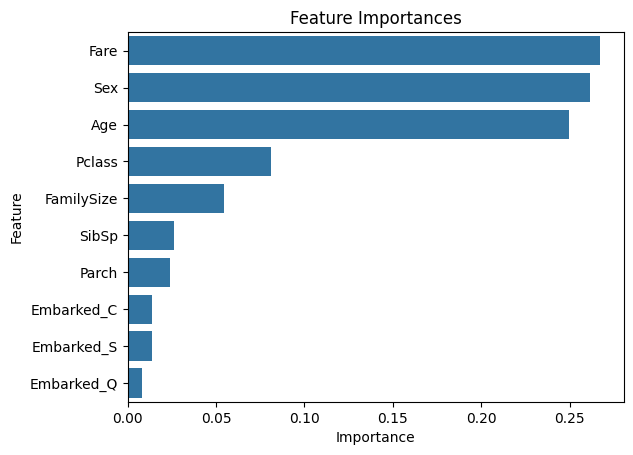

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=df_importance)
plt.title('Feature Importances')
plt.show()


In [88]:
"""
This graph shows the importance of each feature in predicting survival on the Titanic.
Since Fare, Sex, and Age have the highest importance scores, it means these three features contribute the most to the survival prediction.
Fare: Indicates that the fare a passenger paid has a significant impact on survival. This is likely linked to economic status or cabin class.
Sex: Reflects the strong difference in survival rates between males and females, which aligns with the historical "women and children first" policy during the Titanic disaster.
Age: Shows that age plays an important role in survival probability, with children and elderly passengers being affected differently.
"""

'\nThis graph shows the importance of each feature in predicting survival on the Titanic.\nSince Fare, Sex, and Age have the highest importance scores, it means these three features contribute the most to the survival prediction.\nFare: Indicates that the fare a passenger paid has a significant impact on survival. This is likely linked to economic status or cabin class.\nSex: Reflects the strong difference in survival rates between males and females, which aligns with the historical "women and children first" policy during the Titanic disaster.\nAge: Shows that age plays an important role in survival probability, with children and elderly passengers being affected differently.\n'